In [38]:
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import numpy as np


class single_var:
    '''
    Visualizations that incorporate only one variable
    
    Parameters:
    - study: string specifying the study name
    '''

    def __init__(self, study):
        # figure type - for naming when saving
        self.fig_type = ''
        # study - for naming when saving
        self.study = study

    def timeseries(self, t, y, save=False, **kwargs):
        '''
        Plots a time series of the data
        
        Parameters:
        - t: list of points in time - assumed to be datetime
        - y: list of dependent values - length must be that of t
        - save: whether or not to save the figure, default is False
        
        Possible (other) Parameters:
        - figsize: tuple specifying the size of the figure - default is (16,8)
        - ylabel (or label): string specifying the ylabel - default is None
        - ylim: tuple specifying the y-axis limits - default is [min(y),max(y)]
        - yticks: list specifying the yticks to use - dfault is determined by matplotlib
        
        Returns:
        - fig: the figure handle
        - ax: the axis handle
        '''
        self.fig_type = 'timeseries'

        # setting up figure
        if 'figsize' in kwargs.keys():
            fig, ax = plt.subplots(figsize=kwargs['figsize'])
        else:
            fig, ax = plt.subplots(figsize=(16,8))

        # plotting data
        ax.plot(t,y,linewidth=2,color='black')
        
        # Setting label
        ## x - should never be specified and will remain blank since date formats are obvious (imo)
        ax.set_xlabel('')
        ## y 
        if 'ylabel' or 'label' in kwargs.keys():
            try:
                ax.set_ylabel(kwargs['ylabel'])
            except:
                ax.set_ylabel(kwargs['label'])
        else:
            ax.set_ylabel('')
        
        # Setting limits
        ## x - should never be specified
        ax.set_xlim([t[0],t[-1]])
        ## y
        if 'ylim' in kwargs.keys():
            ax.set_ylim(kwargs['ylim'])
        else:
            ax.set_ylim([np.nanmin(y),np.nanmax(y)])
            
        # Setting ticks
        ## x - should never be specified
        ## xticks are determined based on the number of days included in t - breakpoints are shown below:
        ##  - dt(t) < 2 days - hourly (48 ticks)
        ##  - dt(t) < 7 weeks - daily (49 ticks)
        ##  - dt(t) < 1 year - weekly (52 ticks)
        ##  - dt(t) < 4 years - monthly (48 ticks)
        ##  - dt(t) > 4 years - yearly 
        if t[-1] - t[0] < timedelta(days = 2):
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
            ax.xaxis.set_major_locator(mdates.DayLocator())
            ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
            ax.xaxis.set_minor_locator(mdates.HourLocator())
        elif t[-1] - t[0] < timedelta(days = 49):
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
            ax.xaxis.set_major_locator(mdates.MonthLocator())
            ax.xaxis.set_minor_formatter(mdates.DateFormatter('%a %d'))
            ax.xaxis.set_minor_locator(mdates.DayLocator())
        elif t[-1] - t[0] < timedelta(days = 365):
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
            ax.xaxis.set_major_locator(mdates.WeekdayLocator())
        elif t[-1] - t[0] < timedelta(days = 4*365):
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
            ax.xaxis.set_major_locator(mdates.YearLocator())
            ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
            ax.xaxis.set_minor_locator(mdates.MonthLocator())
        else:
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
            ax.xaxis.set_major_locator(mdates.YearLocator())
            
        plt.xticks(rotation=-45,ha='left')
        plt.setp(ax.xaxis.get_minorticklabels(), rotation=-45, ha='left')
        ## y
        if 'yticks' in kwargs.keys():
            ax.set_yticks(kwargs['yticks'])
        else:
            # default
            pass
            
        # saving figure
        if save:
            # default location for Hagen's projects
            y_var = input('Shorthand for y-variable: ') ## user input for variable to identify figure
            plt.savefig(f'../../reports/figures/{self.study}-{yvar}-{self.fig_type}.pdf')
        
        # return the fig and axis so user can do more unique modifications
        return fig, ax


In [39]:
plotter = single_var('test')

(<Figure size 1152x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x113fef5c0>)

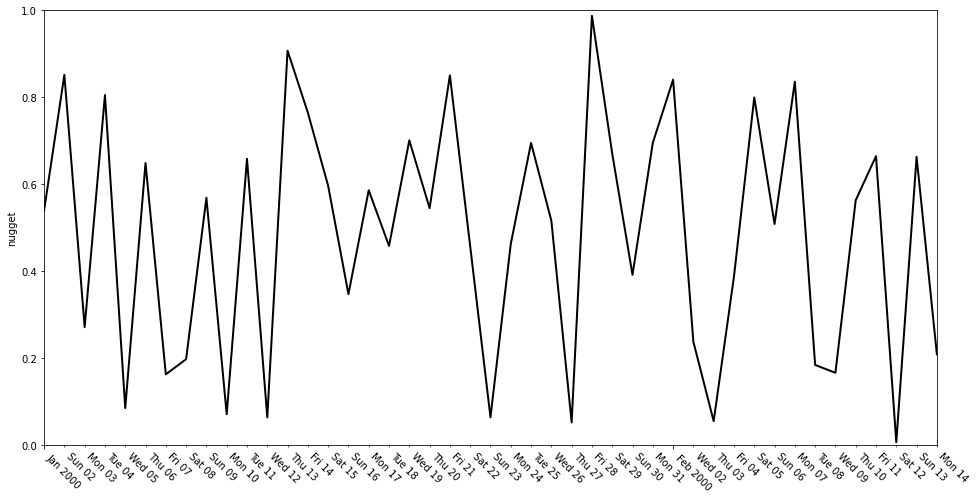

In [40]:
base = datetime(2000, 1, 1)
t = np.array([base + timedelta(days=i) for i in range(45)])
y = np.random.rand(len(t))
plotter.timeseries(t,y,ylim=[0,1],label='nugget')